# 3 неделя обучения

# 3.1 Снова возвращаемся к деревьям

Вынесем занова данные по данным "титаника", так как автор иногда перпрыгивает с одной части на другую

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
titanik_data = pd.read_csv('train.csv')

In [4]:
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = X.fillna({'Age' : X.Age.median()})
X = pd.get_dummies(X)

In [5]:
y = titanik_data.Survived

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Постороим заново дерево решений и посмотрим как влияют дополнительные парметры, такие как "min_samples_split"  и 
"min_samples_leafна построения дерево

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Graphviz/bin'

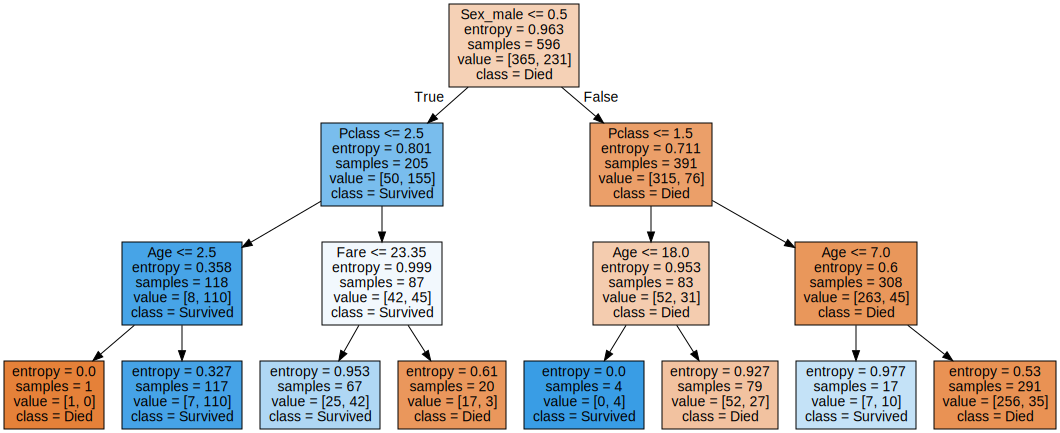

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

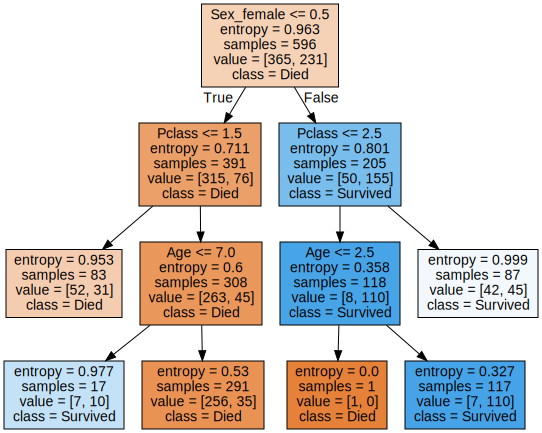

In [12]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

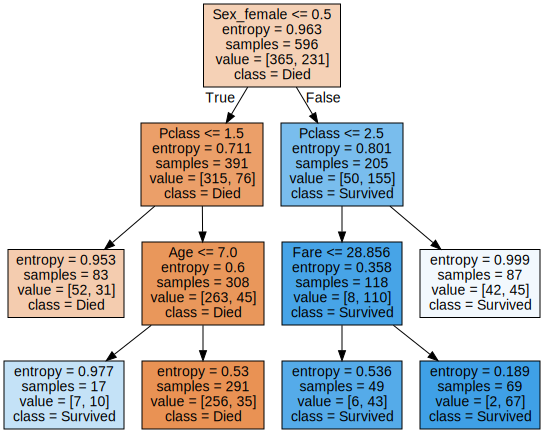

In [14]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

# 3.2 Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
clf_rf = RandomForestClassifier()

In [17]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [18]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [19]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [20]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

# Задача

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, 
поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и 
поместите его в переменную 
predictions.

In [21]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf = rf.fit(X_train, y_train)
predictions_15 = rf.predict(X_test)
predictions_15

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Продолжение

In [22]:
best_clf = grid_search_cv_clf.best_estimator_

In [23]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [24]:
feature_importances = best_clf.feature_importances_

In [25]:
feature_importances_df = pd.DataFrame({'feature' : list(X_train),
                                       'feature_importances' : feature_importances})

In [26]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
5,Sex_female,0.294408
6,Sex_male,0.240527
0,Pclass,0.128483
4,Fare,0.115295
1,Age,0.113453
2,SibSp,0.041716
3,Parch,0.025712
7,Embarked_C,0.020742
9,Embarked_S,0.011255
8,Embarked_Q,0.008408


# Задача

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

Код для отрисовки важности фичей


imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Открываем и смотрим данные

In [27]:
Integrated = pd.read_csv('heart-disease.csv')
Integrated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Определяем данные для обучения дерева решений

In [28]:
X_train_Integrated = Integrated.drop(['target'], axis=1)
y_train_Integrated = Integrated.target

Проверяем на неизвестные значения

In [29]:
Integrated.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: >

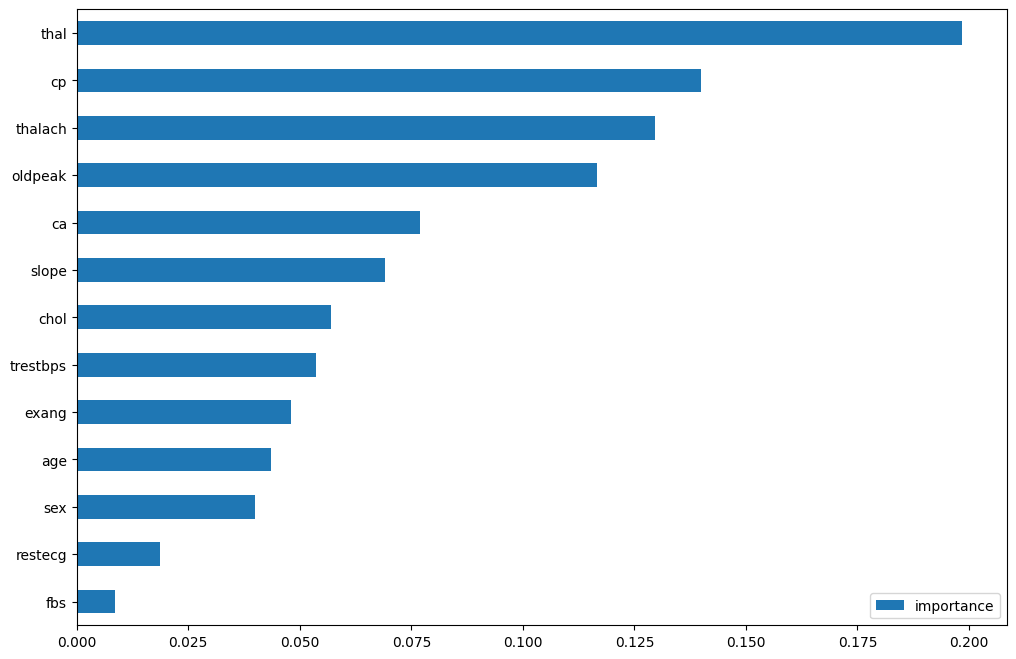

In [30]:
np.random.seed(0)
rf_Integrated = RandomForestClassifier(10, max_depth=5)
rf_Integrated.fit(X_train_Integrated, y_train_Integrated)
imp = pd.DataFrame(
    rf_Integrated.feature_importances_,
    index=X_train_Integrated.columns,
    columns=["importance"]
)
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# 3.5 И на Марсе будут яблони цвести

In [92]:
train_mush = pd.read_csv('training_mush.csv')
train_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [93]:
train_mush.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10
max_depth: от 1 до 12 с шагом 2
min_samples_leaf: от 1 до 7
min_samples_split: от 2 до 9 с шагом 2
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [94]:
X_mush_train = mush.drop(['class'], axis = 1)
y_mush_train = mush.loc[:,'class']

In [95]:
clf_mush = RandomForestClassifier(random_state=0)
parametrs_for_clf_mush = {'n_estimators': [10, 20, 30, 40, 50], 
                          'max_depth': [1, 3, 5, 7, 9, 11],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                          'min_samples_split': [2, 4, 6, 8]}
grid_search_cv_clf_mush = GridSearchCV(clf_mush, parametrs_for_clf_mush, cv = 3, n_jobs=-1)
grid_search_cv_clf_mush.fit(X_mush_train, y_mush_train)
grid_search_cv_clf_mush.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Выберите правильные утверждения о важности фичей для нашего классификатора

<AxesSubplot: >

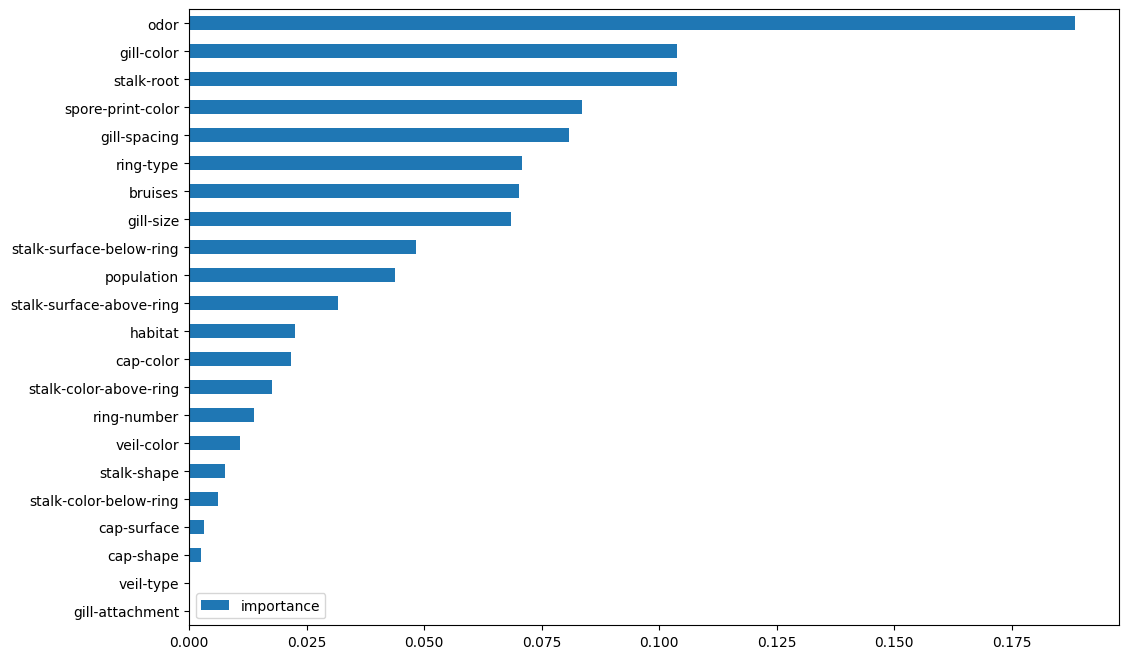

In [96]:
best_clf = grid_search_cv_clf_mush.best_estimator_

best_clf.fit(X_mush_train, y_mush_train)

important = pd.DataFrame(
    best_clf.feature_importances_,
    index=X_mush_train.columns,
    columns=["importance"]
)
important.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [120]:
Test_mush = pd.read_csv('testing_mush.csv')

In [121]:
Test_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [122]:
X_test = Test_mush

In [123]:
y_pred_mush = best_clf.predict(X_test)

In [124]:
Test_mush['class'] = y_pred_mush

In [125]:
Test_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,3,8,1,3,1,0,0,4,0,...,7,7,0,2,1,4,2,3,3,0
1,5,3,4,1,5,1,0,0,10,1,...,6,6,0,2,1,4,3,5,0,0
2,3,3,4,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
3,3,2,2,0,7,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
4,3,2,2,0,8,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1
2027,5,2,8,1,0,1,0,0,10,0,...,7,7,0,2,1,4,2,2,1,0
2028,5,3,3,0,2,1,0,0,3,0,...,6,0,0,2,1,2,1,4,4,1
2029,5,3,3,1,5,1,0,0,9,1,...,3,3,0,2,1,4,3,4,0,0


In [126]:
Test_mush[Test_mush['class']==1]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
2,3,3,4,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
3,3,2,2,0,7,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
4,3,2,2,0,8,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1
6,5,2,3,1,2,1,0,0,10,1,...,7,7,0,2,1,4,1,4,5,1
8,2,0,9,0,2,1,0,0,2,0,...,6,0,0,2,1,2,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2,3,8,1,5,1,1,1,10,0,...,7,7,0,2,1,4,7,1,2,1
2025,2,0,3,0,2,1,0,0,2,0,...,0,0,0,2,1,2,1,5,1,1
2026,3,3,2,0,2,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,6,0,0,2,1,2,1,4,4,1


Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

In [127]:
y_true_mush = pd.read_csv('testing_y_mush.csv')

In [128]:
y_true_mush

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


<AxesSubplot: >

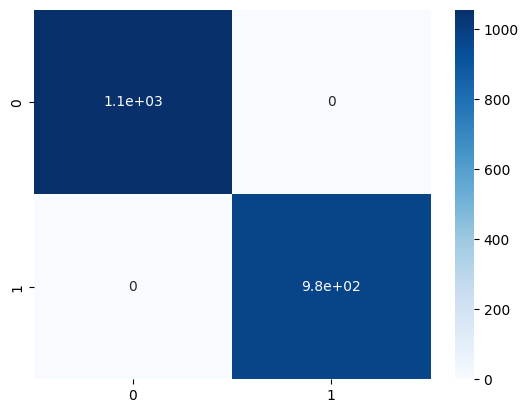

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_mush, y_pred_mush), annot=True, cmap="Blues")

Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [251]:
train_invasion = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
train_invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [252]:
X_train_invasion = train_invasion.drop('class', axis=1)
y_train_invasion = train_invasion.loc[:, 'class']

Проверим кореляцию между данными

In [253]:
X_train_invasion.corr()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
g_reflection,1.000000,-0.182375,0.465410,-0.219170,-0.012570,0.448030
i_reflection,-0.182375,1.000000,-0.434940,0.715616,-0.020922,0.518784
speed,0.465410,-0.434940,1.000000,-0.552377,-0.027782,-0.105198
brightness,-0.219170,0.715616,-0.552377,1.000000,0.013765,0.642957
time_of_observance,-0.012570,-0.020922,-0.027782,0.013765,1.000000,0.026136
volume,0.448030,0.518784,-0.105198,0.642957,0.026136,1.000000


Значение brightness очень сильно корелирует с i_reflection, поэтому уберем лишние данные и проверим еще раз

In [254]:
X_train_invasion = X_train_invasion.drop('brightness', axis=1)


In [227]:
X_train_invasion.corr()

C:\Users\v.makarov\AppData\Local\Temp\ipykernel_10960\209019907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_invasion.corr()


,g_reflection,i_reflection,speed,time_of_observance,volume
g_reflection,1.000000,-0.182375,0.465410,-0.012570,0.448030
i_reflection,-0.182375,1.000000,-0.434940,-0.020922,0.518784
speed,0.465410,-0.434940,1.000000,-0.027782,-0.105198
time_of_observance,-0.012570,-0.020922,-0.027782,1.000000,0.026136
volume,0.448030,0.518784,-0.105198,0.026136,1.000000


In [255]:
X_train_invasion.corr()

,g_reflection,i_reflection,speed,time_of_observance,volume
g_reflection,1.000000,-0.182375,0.465410,-0.012570,0.448030
i_reflection,-0.182375,1.000000,-0.434940,-0.020922,0.518784
speed,0.465410,-0.434940,1.000000,-0.027782,-0.105198
time_of_observance,-0.012570,-0.020922,-0.027782,1.000000,0.026136
volume,0.448030,0.518784,-0.105198,0.026136,1.000000


Нарисуем предварительно дерево, чтобы посмотреть структуру

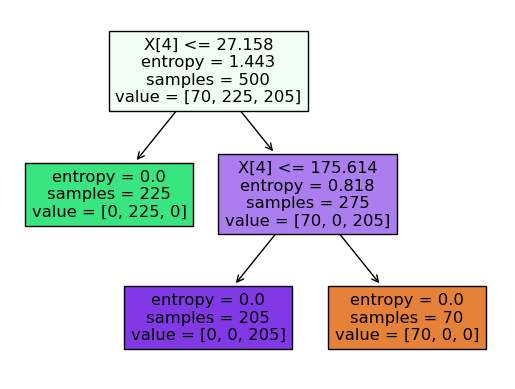

In [256]:
clf_1 = tree.DecisionTreeClassifier(criterion='entropy')
clf_1.fit(X_train_invasion,y_train_invasion)
tree.plot_tree(clf_1,filled=True); 

In [257]:
clf_invasion = RandomForestClassifier(random_state=0)
parametrs_for_clf_invasion = {'n_estimators': range(1,10), 
                          'max_depth': range(1,10),
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                          'min_samples_split': [2, 4, 6, 8]}
grid_search_cv_clf_invasion = GridSearchCV(clf_invasion, parametrs_for_clf_invasion, cv = 5, n_jobs=-1)
grid_search_cv_clf_invasion.fit(X_train_invasion, y_train_invasion)
grid_search_cv_clf_invasion.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 5}

In [258]:
best_clf_invasion = grid_search_cv_clf_invasion.best_estimator_

In [261]:
test_invasion = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
test_invasion

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [263]:
X_test_invasion = test_invasion.drop('brightness', axis=1)

In [264]:
test_invasion['class'] = best_clf_invasion.predict(X_test_invasion)

In [265]:
test_invasion

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume,class
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224,fighter
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130,transport
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556,transport
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829,transport
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813,fighter
...,...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917,fighter
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358,fighter
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083,transport
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761,fighter


In [266]:
test_invasion.groupby('class').count()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
class,,,,,,
cruiser,230,230,230,230,230,230
fighter,675,675,675,675,675,675
transport,595,595,595,595,595,595


Какая переменная оказалась самой важной для классифицирования кораблей?

<AxesSubplot: >

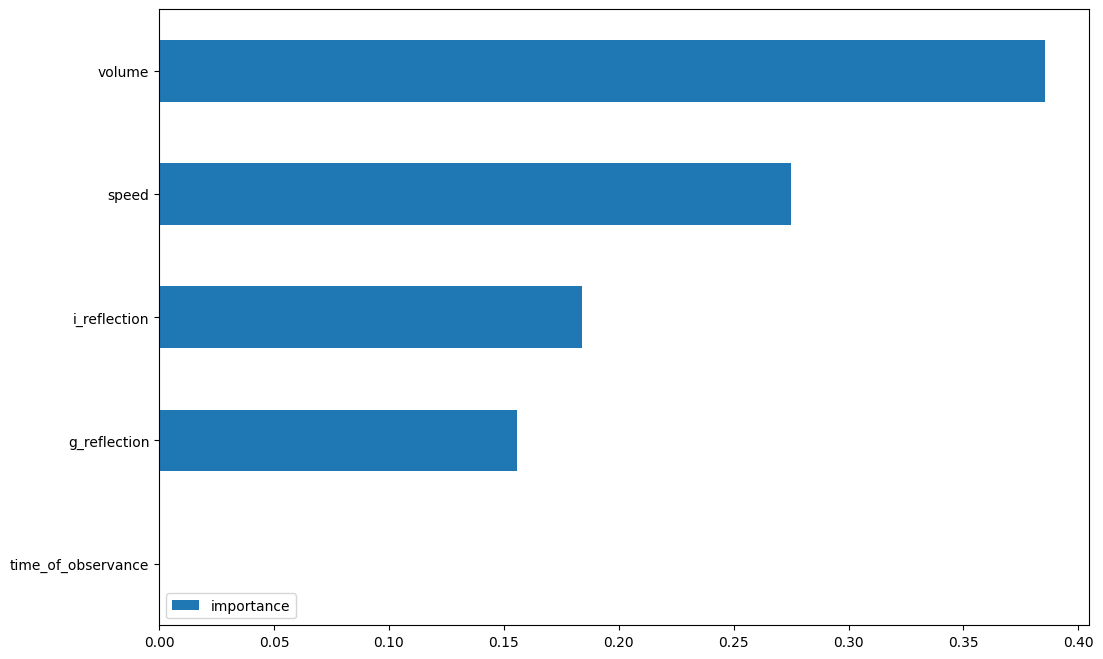

In [267]:
important = pd.DataFrame(
    best_clf_invasion.feature_importances_,
    index=X_train_invasion.columns,
    columns=["importance"]
)
important.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [272]:
important.sort_values('importance', ascending=False)

,importance
volume,0.385408
speed,0.274785
i_reflection,0.184214
g_reflection,0.155593
time_of_observance,0.000000


Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [273]:
space_can_be_a_dangerous_place = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [274]:
space_can_be_a_dangerous_place

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [275]:
space_can_be_a_dangerous_place.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


In [277]:
space_can_be_a_dangerous_place = space_can_be_a_dangerous_place.drop(['r', 'phi', 'peradventure_index', 'dustiness'], axis=1)

In [278]:
space_can_be_a_dangerous_place.corr()

,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
black_hole_is_near,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.002661,-0.003031,1.000000,0.299508
dangerous,0.052968,0.344469,0.299508,1.000000


Исходя из кореляции buggers_were_noticed и nearby_system_has_planemo заметнее всего влияют на dangerous